## Heatmap
The Heat Map Chart represents data in a tabular format with user-defined color ranges.
Plot Categorical Variables X & Y
- X & Y are plotted along vertical andhorizontal
- Cells represent continuousvalues
- Color gradient shows progression of continuous values
- You can choose gradient to highlight low values or highvalues  


usage;
1. Combinations of rows and columns with high or low values – Biclusters
2. Sorting the rows and columns (Unordered categorical)- limited to 7 categories
3. Encourages comparison and patternfinding
4. Sorting changespatterns!

In [ ]:
!pip install --upgrade --user seaborn
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from scipy.spatial import ConvexHull

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



#### Dataset:  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/


In [2]:
#load dataset
cols =['symboling', 'normalized-losses','make', 'fuel-type', 'aspiration', 'num-of-doors','body-style','drive-wheels','engine-location',
      'wheel-base', 'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system',
      'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
missing_values = ["n/a", "na", "--" ,"?"]
df_car = pd.read_csv("imports-85.data" , header= None , names=  cols , na_values = missing_values)
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Are there certain combinations of make and body-styles that have high city-mpg?  
**Answer :** In order to present any pair of __*body-styles*__ and __*make*__ that have high __*city_mpg*__, I have used a heatmap. \
I selected the column and then calulated the mean of  __*city_mpg*__ for each pair of  __*body-styles*__ and __*make*__ , then I present it by a heatmap.
Base on heatmap, The following pairs have the highest  __*city_mpg*__ :
1. chevrolet , hatchback body-style : 42 
2. chevrolet , sedan : 38

**Note:** 
Some of pairs do not have any car on dataset. Hence, some blocks of heatmap are empty.

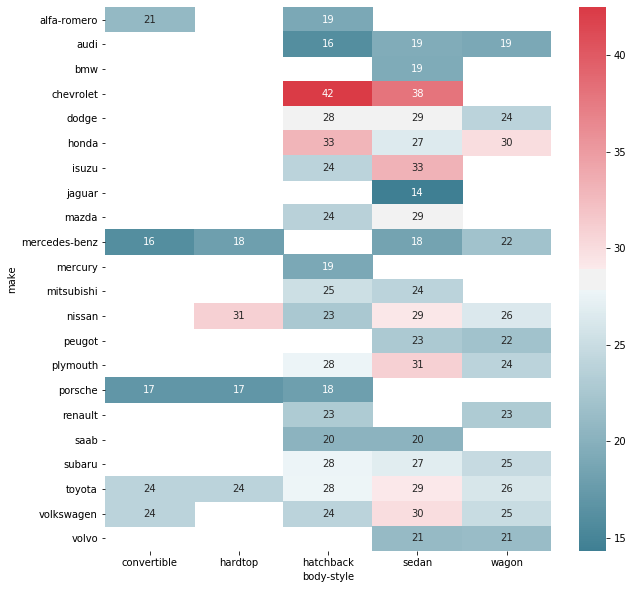

In [4]:
df_a  = df_car[['make','body-style', 'city-mpg' ]].groupby(['make','body-style']).mean().reset_index()
df_a = df_a.pivot(index='make', columns='body-style', values='city-mpg')

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_a, cmap=cmap, annot=True)
plt.show()